In [1]:
from IPython.display import IFrame

In [2]:
%matplotlib inline

# *Hubble and the origins of DESI*

The year 1929 brought us the Oscars, the first car radio and Edwin Hubble's unexpected observation that all galaxies are moving away from us!

![title](desihigh/images/edwin-hubble.jpg)

Let's take a quick look at some of the galaxies he was looking at, Triangulum and the Large Magellanic Cloud.

![title](desihigh/images/Triangulum.jpg)
![title](desihigh/images/LMC.jpg)

In total, Edwin studied the distances of 24 galaxies from us, and their observed `redshifts'.  What does that mean?

Maybe you already know that the energy levels of Hydrogen are __quantized__, with electrons habitating a series of shells with __discrete__ energies.  When an electron transitions between any two levels, light is emitted with a wavelength neatly given by the "Rydberg" formula: 

$$
\frac{1}{\lambda_{\rm vac}} = 1.096 \times 10^{7} \left ( \frac{1}{n^2} - \frac{1}{m^2} \right ) 
$$

where $n$ and $m$ (any one of $[0, 1, 2, ... \infty]$) label the two energy levels. 

In [3]:
# First, let's import some useful packages:
import os
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np


from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   tools.wave2rgb  import wavelength_to_rgb
from   pkg_resources   import resource_filename

In [4]:
def Rydberg(n, m):
    # Vacuum wavelengths [nanometres]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

Let's workout the wavelengths of light that Hydrogen can emit:

In [5]:
waves = []

print('n \t m \t Wavelength [nm]')

for n in np.arange(1, 10, 1):
    for m in np.arange(n+1, 10, 1):
        wave = Rydberg(n, m)        
        waves.append(wave)
        
        print('{:d} \t {:d} \t {:.3f}'.format(n, m, wave))

n 	 m 	 Wavelength [nm]
1 	 2 	 121.655
1 	 3 	 102.646
1 	 4 	 97.324
1 	 5 	 95.043
1 	 6 	 93.848
1 	 7 	 93.142
1 	 8 	 92.689
1 	 9 	 92.381
2 	 3 	 656.934
2 	 4 	 486.618
2 	 5 	 434.480
2 	 6 	 410.584
2 	 7 	 397.405
2 	 8 	 389.294
2 	 9 	 383.923
3 	 4 	 1876.955
3 	 5 	 1283.075
3 	 6 	 1094.891
3 	 7 	 1005.931
3 	 8 	 955.541
3 	 9 	 923.814
4 	 5 	 4055.150
4 	 6 	 2627.737
4 	 7 	 2167.662
4 	 8 	 1946.472
4 	 9 	 1819.203
5 	 6 	 7465.163
5 	 7 	 4657.086
5 	 8 	 3743.215
5 	 9 	 3299.335
6 	 7 	 12380.685
6 	 8 	 7507.821
6 	 9 	 5912.409
7 	 8 	 19075.426
7 	 9 	 11316.720
8 	 9 	 27823.100


Now let's plot the wavelengths and see the color of these lines.  If we were to look at a emitting Hydrogen atom, you'd see this:

(380.0, 780.0)

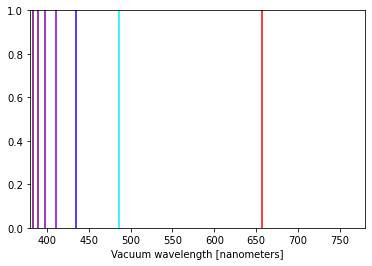

In [6]:
for wave in waves:
  # color = [r, g, b]
  color = wavelength_to_rgb(wave)       
  pl.axvline(x=wave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

If the hydrogen exists in a galaxy that is moving, we see the lines Doppler shifted. We will call this the "redshift" of the galaxy, often denote  as $z$ (https://en.wikipedia.org/wiki/Redshift). Let's say the galaxy is moving at 1% the speed of light (v = 0.1*c), we can calculate the redshift with the following equation:
$$
1 + z = \sqrt{\frac{1 + v/c}{1 + v/c}}
$$

In [7]:
def redshift(v):
    # v [speed of light].
    result = (1. + v) / (1. - v) 
    result = np.sqrt(result) - 1.
    
    return  result

(380.0, 780.0)

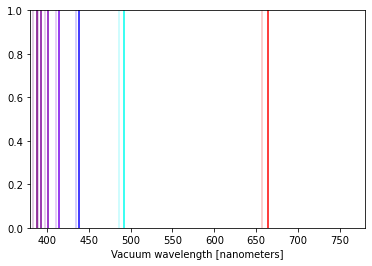

In [8]:
zz = redshift(0.01) 

for restwave in waves:
  obswave = (1. + zz) * restwave     

  color   = wavelength_to_rgb(restwave)       
  pl.axvline(x=restwave, c=color, alpha=0.25)

  color   = wavelength_to_rgb(obswave)       
  pl.axvline(x=obswave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

Here you see the original line (faint) and the line shifted if the galaxy with the emitting Hydrogen is moving. https://en.wikipedia.org/wiki/Doppler_effect will tell you all the details.

Hubble knew the lines of Hydrogen, and for many other elements.  By reversing above, he was able to calculate the velocity for many galaxies.  He found out how far away there were (from how bright some special stars in the galaxy were - https://en.wikipedia.org/wiki/Cepheid_variable) and how fast they were moving (from their redshift, as above):

In [9]:
hub = resource_filename('desihigh','dat/hubble.dat')

In [10]:
dat = pd.read_csv(hub, sep='\s+', comment='#', names=['Galaxy name', 'Distance [Mpc]', 'Velocity [km/s]'])
dat

,Galaxy name,Distance [Mpc],Velocity [km/s]
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC6822,0.214,-130
3,NGC598,0.263,-70
4,NGC221,0.275,-185
5,NGC224,0.275,-220
6,NGC5457,0.450,200
7,NGC4736,0.500,290
8,NGC5194,0.500,270
9,NGC4449,0.630,200


Let's plot them.

In [11]:
fig = plt.figure(figsize=(10, 7.5))
ax  = fig.add_subplot(1, 1, 1)
plt.close()

In [12]:
label_style = {'fontname': 'Georgia', 'fontsize': 16} 

In [13]:
ax.plot(dat['Distance [Mpc]'], dat['Velocity [km/s]'], '-', c='k', marker='*', lw=0)

ax.set_xlabel('Distance from us [Megaparsecs]', **label_style)
ax.set_ylabel('Recession velocity [km/s]', **label_style)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


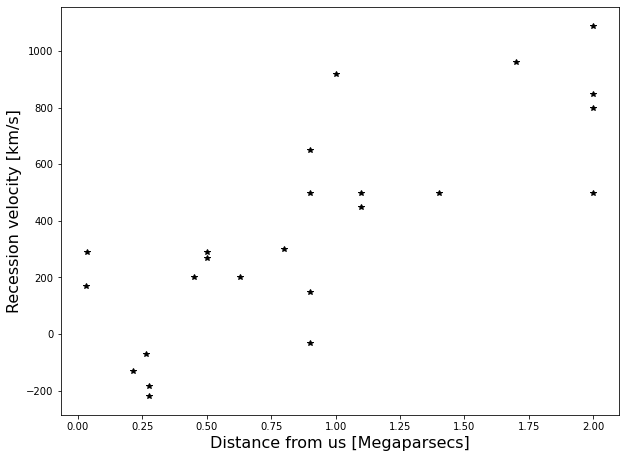

In [14]:
fig

Edwin saw a clear trend, but the measurements seemed pretty noisy.  Let's figure out our best guess at the true relationship between the two.  We'll look at a linear relationship (regression) using the scipy stats package:

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['Distance [Mpc]'],dat['Velocity [km/s]'])

In [16]:
print('The gradient to this trend is known as the Hubble constant:  {:.3f} [km/s/Mpc]'.format(slope))

The gradient to this trend is known as the Hubble constant:  454.158 [km/s/Mpc]


Let's see what that looks like. 

In [17]:
distances  = np.linspace(-0.5, 2.5, 10)
velocities = slope * distances

ax.plot(distances, velocities, lw=0.25, c='k')
ax.set_xlim(0.0, 2.5)

(0.0, 2.5)

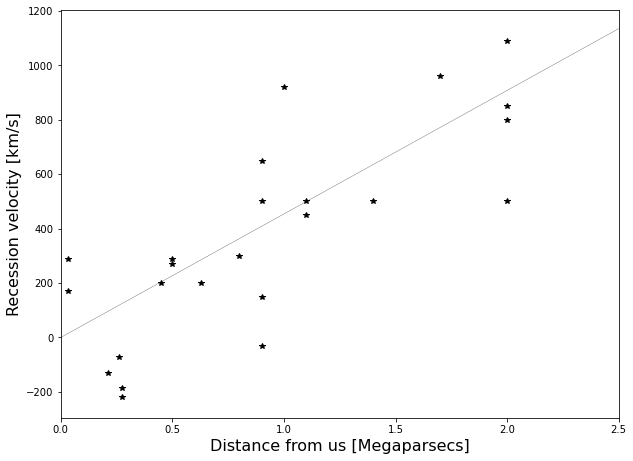

In [18]:
fig

Seems a pretty good fit! 

Now it's your turn, can you figure out a good estimate of the error on this measurement of the Hubble costant.  How accurately can we predict the recession of a galaxy at a given distance, i.e. how fast or slow could it be moving?    

So in conclusion, every galaxy is likely to be moving away from us!  We find this to be true of all galaxies - we are not at center or special in any way.  Every galaxy is moving away from every other.  The fact that the Universe was expanding came as a shock to many in 1929, but an even greater surprise was in store.    

# *Dark Energy*

In 1998, the world would change forever.  Larry Page and Sergey Brin founded Google, the American Unity node and Russian Zarya module would be brought together to form the [International Space Station](https://en.wikipedia.org/wiki/International_Space_Station), and Lawrence Berkeley Lab's
very own Saul Perlmutter, Brian Schmidt and Adam Reiss irrefutably confirmed the existence of _Dark Energy_. Here's Saul impressing some young Berkeley researchers with these results at the time:

![title](desihigh/images/perlmutter.png)

So what was everyone looking at?  Let's breakdown the data.

Saul and his team measured the redshift ($z$) and the effective magnitude for several Type Ia Supernovae (https://en.wikipedia.org/wiki/Type_Ia_supernova)

In [19]:
perl    = resource_filename('desihigh', 'dat/perlmutter.txt')

In [20]:
dat     = pd.read_csv(perl, names=['z', 'Effective magnitude'], comment='#', sep='\s+')
toprint = dat[:10]
toprint

,z,Effective magnitude
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55
5,0.372,22.26
6,0.378,22.58
7,0.453,23.17
8,0.465,23.33
9,0.498,23.71


A plot would show this a lot more clearly:

Text(0, 0.5, 'Effective magnitude')

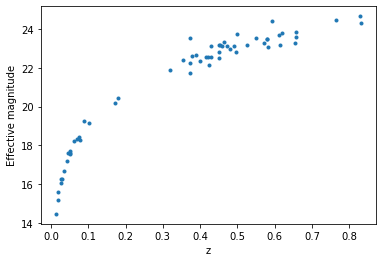

In [21]:
pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.xlabel('z')
pl.ylabel('Effective magnitude')

Saul has good reason to believe (really, he had to tweak them a bit first) that every [type Ia supernovae](https://en.wikipedia.org/wiki/Type_Ia_supernova) shown here was equally bright intrinsically, but those at high redshift appeared relatively faint compared to those at low redshift, as they were simply further away.  This explains the trend shown, given that 'effective magnitude' is the awkward way in which astronomers typically express how bright something appears.

The useful thing about this measurement is that how far away a supernovae or galaxy is for a given redshift depends on a few parameters, one of which is how much Dark Energy there might be in the Universe.  Almost everyone expected this data to prove there was _no_ _Dark Energy_ when Saul made it, but a few guessed otherwise.  

When Hubble discovered the expansion, a natural consequence was that the amount of (rest mass) energy contained within a cubic meter would dilute with time.  Dark Energy would be special, as the amount of energy per cubic meter would instead be constant with time and would suggest that spooky effects of [quantum mechanics](https://en.wikipedia.org/wiki/Quantum_mechanics) would be causing the galaxies to separate.         

So let's use Saul's data to figure out how much Dark Energy is in the Universe.  First, we need a model for the (luminosity) distance of a supernovae at a given redshift, given some amount of Dark Energy.  We use $\Omega_\Lambda$ to denote the _fraction_ of all matter that behaves like Dark Energy. 

In [22]:
from astropy.cosmology import FlatLambdaCDM

def lumdist(z, olambda):
  cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    
  return  cosmo.luminosity_distance(z)   

We then need to convert this distance into how astronomers measure brightness:

In [23]:
def effmag(z, olambda, MB):
  DL = lumdist(z, olambda)   

  return MB + 5. * np.log10(DL.value)    

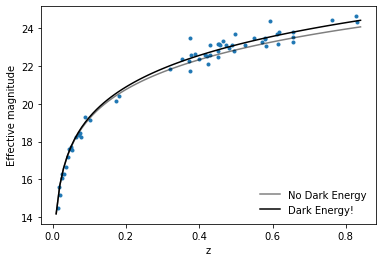

In [24]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k', label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k', label='Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

Even by eye, the data looks to prefer some Dark Energy.  But there's not a huge amount in it.  Let's figure out what exactly the data prefers.  To do this, we'll assume that minimising the distance between each point and the line is the best measure of how well the theory fits the data (see https://en.wikipedia.org/wiki/Least_squares).  Together with the fraction of Dark Energy, we also don't know how bright every supernovae is intrinsically so we'll fit for that simultaneously.   

In [25]:
from scipy.optimize import minimize

In [26]:
def chi2(x):
     olambda = x[0]
     MB      = x[1] 
    
     model   = effmag(dat['z'], olambda, MB) 
     
     return  np.sum((dat['Effective magnitude'] - model)**2.) 

In [27]:
res = minimize(chi2, x0=[0.5, 5.0], options={'disp': True})

Optimization terminated successfully.
         Current function value: 6.018565
         Iterations: 10
         Function evaluations: 39
         Gradient evaluations: 13


In [28]:
res.x

array([0.75146005, 5.82802909])

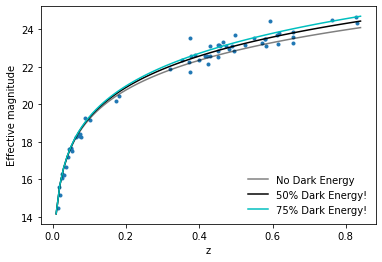

In [29]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k',   label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k',   label='50% Dark Energy!')
pl.plot(zs, effmag(zs, 0.75, 6.), c='c', label='75% Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

So there's something like 75% dark energy in the Universe!  As the first people to make this measurement, Saul, together with Brian Schmidt and Adam Reiss, would be awarded the 2011 Nobel Prize for their work.

![title](desihigh/images/perlmutter_nobel.jpg)

You can find all the details of his work here:  https://arxiv.org/pdf/astro-ph/9812133.pdf.  Warning, this is for the pros so don't worry if you don't understand too much!

As honorary principal at DESI High, Saul has a special opening address to all the students, including you! 

In [30]:
perl = resource_filename('desihigh', 'perlmutter/letter.pdf')
perl = os.path.relpath(perl)

IFrame(perl, width=900, height=1000)

The primary motivation for DESI is to repeat similar distant-redshift measurements much more precisely and learn much more about this spooky Dark Energy! 